In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [255]:
import warnings
warnings.filterwarnings('ignore')


# Reading and Understanding Data

In [256]:
df = pd.read_csv('/Users/aadyanthmasthipuram/Downloads/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


## Data Cleaning

- The column instant is an indicator of the serial numbers. Is not really useful. We are better off dropping it
- The column dteday is an object. We could extract the day from this column into a new one and drop this column.

In [257]:
# creating a new column 'day' from 'dteday'
df['day'] = df['dteday'].apply(lambda x: x[:2])
df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,27
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,28
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,29
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,30


In [258]:
# dropping redundant columns
df.drop(['dteday', 'instant'], axis=1,inplace=True)

In [259]:
df.drop(['casual', 'registered'], axis =1, inplace=True )

In [200]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,01
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,02
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [260]:
# rearranging columns
df = df.iloc[:, [12,2,1,3,4,5,0,6,7,8,9,10,11]]
df

,day,mnth,yr,holiday,weekday,workingday,season,weathersit,temp,atemp,hum,windspeed,cnt
0,01,1,0,0,6,0,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02,1,0,0,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03,1,0,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04,1,0,0,2,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05,1,0,0,3,1,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,12,1,0,4,1,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28,12,1,0,5,1,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29,12,1,0,6,0,1,2,10.386653,12.12000,75.2917,8.333661,1341
728,30,12,1,0,0,0,1,1,10.489153,11.58500,48.3333,23.500518,1796


### Checking for outliers in numeric columns


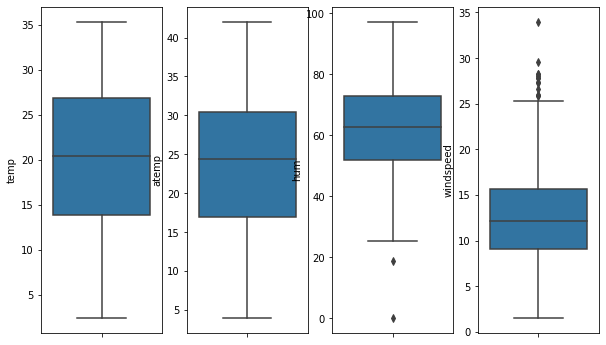

In [71]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(10,6))
i =1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y = col, data =df)
    i += 1

plt.show()

### Inference: 
There are no outliers beyond 3 * IQR.


In [261]:
# converting dtype of an object to an integer
df.day = df['day'].astype('int')

#### We also observe that a few columns, eventhough they have numeric values, can be interpreted as categorical values.
#### We must first replace the names in the dataset and create dummy variables for them, which would be useful for analysis.

In [262]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)
df

,day,mnth,yr,holiday,weekday,workingday,season,weathersit,temp,atemp,hum,windspeed,cnt
0,1,jan,0,0,sat,0,spring,moderate,14.110847,18.18125,80.5833,10.749882,985
1,2,jan,0,0,sun,0,spring,moderate,14.902598,17.68695,69.6087,16.652113,801
2,3,jan,0,0,mon,1,spring,good,8.050924,9.47025,43.7273,16.636703,1349
3,4,jan,0,0,tue,1,spring,good,8.200000,10.60610,59.0435,10.739832,1562
4,5,jan,0,0,wed,1,spring,good,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,dec,1,0,thu,1,spring,moderate,10.420847,11.33210,65.2917,23.458911,2114
726,28,dec,1,0,fri,1,spring,moderate,10.386653,12.75230,59.0000,10.416557,3095
727,29,dec,1,0,sat,0,spring,moderate,10.386653,12.12000,75.2917,8.333661,1341
728,30,dec,1,0,sun,0,spring,good,10.489153,11.58500,48.3333,23.500518,1796


<Figure size 864x2016 with 0 Axes>

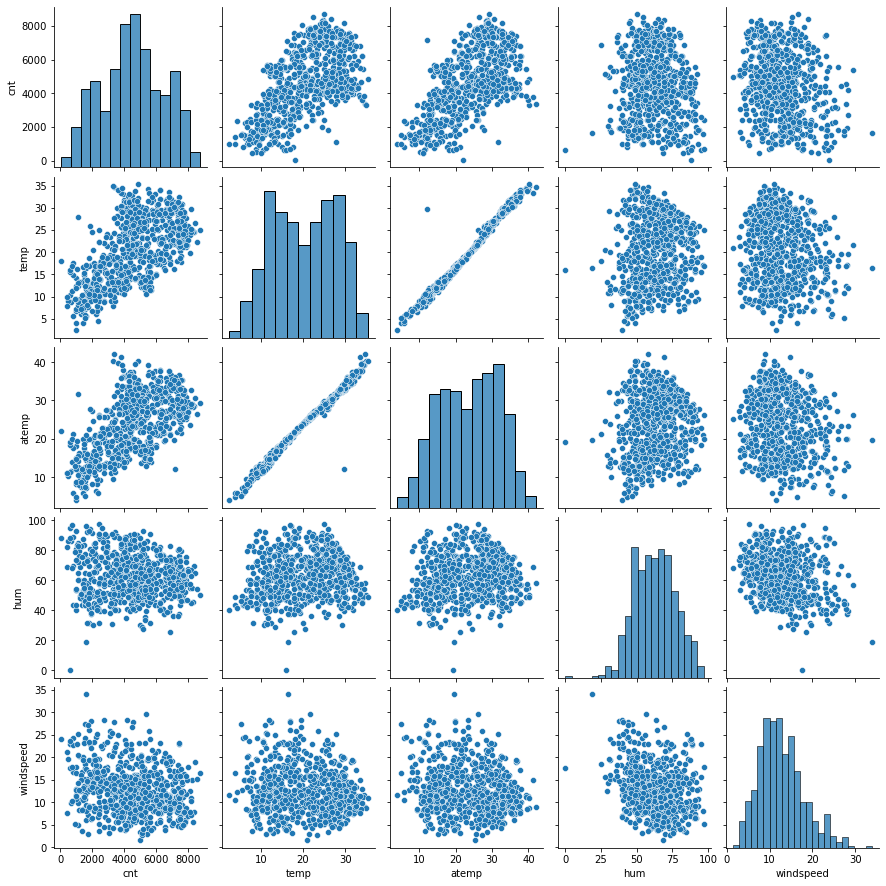

In [74]:
# comparing the linear relationships between the numeric variables
plt.figure(figsize = (12,28))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

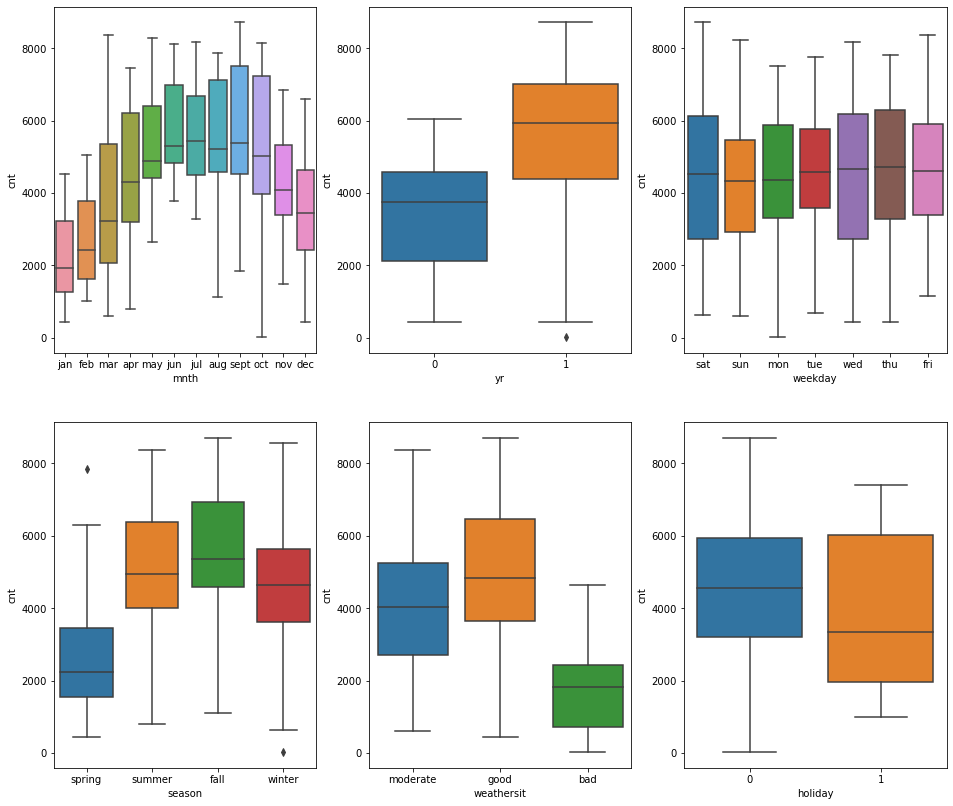

In [75]:
# using boxplots to vizualize categoric variables
plt.figure(figsize= (16,14))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.show()

### Inference:
- Demand for bikes rises steeply on a monthly basis, till June. It peaks in September before falling steeply towards the end of the year.
- There is a higher demand for bikes in 2019, in comparison with the previous year.
- Wednesday, Thursday and Saturday have a higher demand for demand for bikes.
- Fall is the season with the highest amount of demand for bikes, followed by summer, then winter, with spring being the season with the lowest demand.
- Weather has a high correlation with the demand.
- Demand is more on non-holiday days

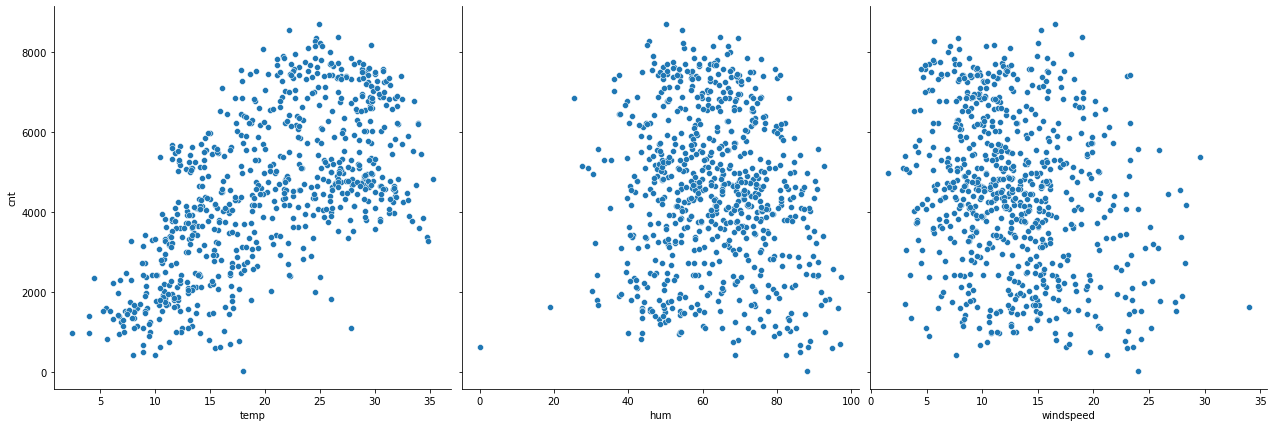

In [76]:
sns.pairplot(df, x_vars = ['temp', 'hum', 'windspeed'], y_vars = 'cnt', size = 6, aspect =1, kind = 'scatter')

### Inference:
- Temperature and cnt are positively correlated, which means demand increases with increase in temperature.
- Demand is not strongly correlated with humidity, but we can see that demand slighlt decreases with decrease in humidity.
- Demand is moderately negatively correlated with windspeed. Increase in windspeed means a dip in demand.

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         730 non-null    int64  
 1   mnth        730 non-null    object 
 2   yr          730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   season      730 non-null    object 
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [264]:
# understanding the dataset
df.describe()

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,8.802278,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,8.000000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,16.000000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,23.000000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,31.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


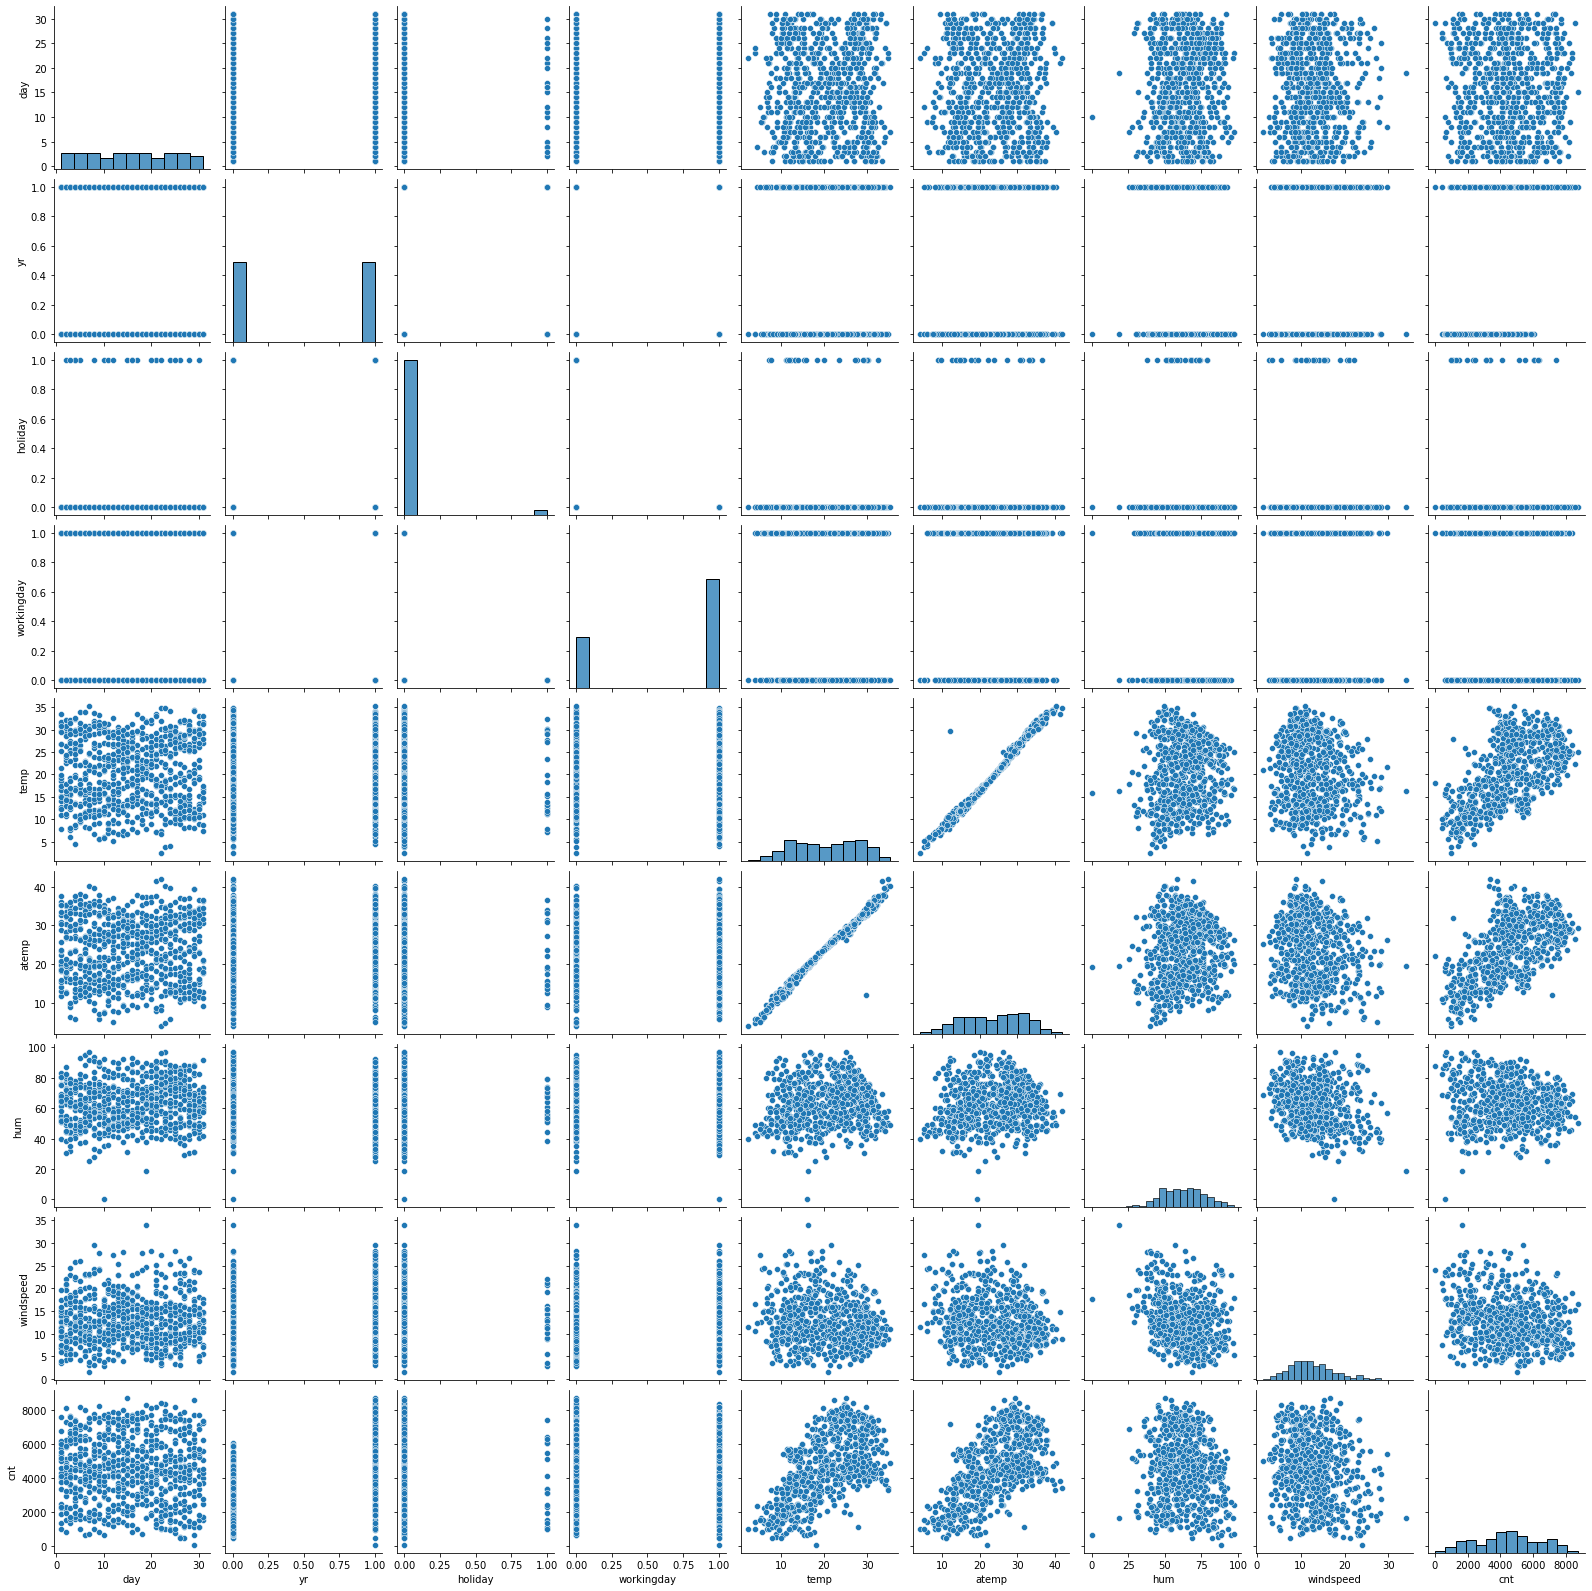

In [265]:
#visualizing the numeric columns in the dataframe
sns.pairplot(df)
plt.show()

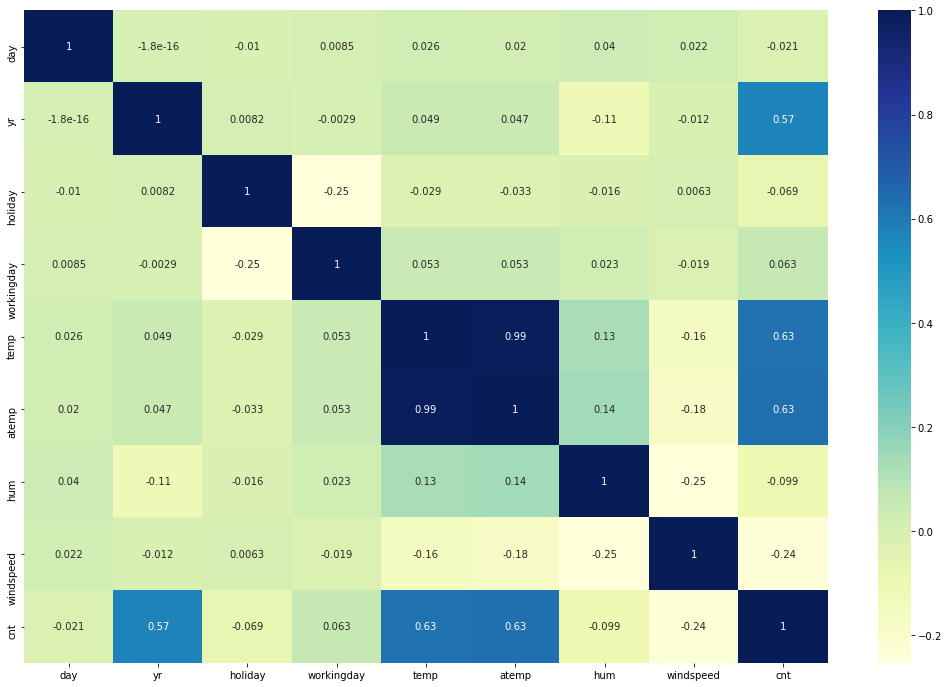

In [266]:
# correlation matrix
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

## Data Preparation


In [267]:
# Creating dummy variables for categoric variables
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])
df

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,1
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,0,1,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,1,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,...,0,0,0,0,1,0,0,0,0,1
726,28,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,...,0,0,0,0,0,0,0,0,0,1
727,29,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,...,0,0,1,0,0,0,0,0,0,1
728,30,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,...,0,0,0,1,0,0,0,0,1,0


In [369]:
df

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,1
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,0,1,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,1,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,...,0,0,0,0,1,0,0,0,0,1
726,28,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,...,0,0,0,0,0,0,0,0,0,1
727,29,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,...,0,0,1,0,0,0,0,0,0,1
728,30,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,...,0,0,0,1,0,0,0,0,1,0


In [370]:
df.columns

Index(['day', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### - Splitting the data

In [798]:
# assigning a variable y to our target variable 'cnt'
#y= df.pop('cnt')

#X is all remainign variable also our independent variables
#X= df

#Train Test split with 70:30 ratio

df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 62)

In [799]:
df_train

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
502,18,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,0,...,0,0,0,0,0,0,0,0,1,0
82,24,0,0,1,11.685000,13.54165,80.5833,16.333729,1865,0,...,0,0,0,0,1,0,0,0,0,1
612,5,1,0,1,30.203347,35.44915,74.1250,12.583136,7112,0,...,1,0,0,0,0,0,1,0,1,0
59,1,0,0,1,10.933347,13.19395,53.5000,14.500475,1851,1,...,0,0,0,0,0,1,0,0,1,0
573,28,1,0,0,30.989153,34.88020,61.3333,10.542450,6685,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,28,0,0,1,16.698193,20.00590,87.6364,19.408962,1446,1,...,0,1,0,0,0,0,0,0,0,1
267,25,0,0,0,26.000847,28.63185,84.5000,3.375406,5010,0,...,1,0,0,1,0,0,0,0,0,1
115,26,0,0,1,25.898347,29.70415,72.9167,21.875500,4400,0,...,0,0,0,0,0,1,0,0,1,0
593,17,1,0,1,29.656653,12.12000,57.0833,15.500718,7148,0,...,0,0,0,0,0,0,0,0,1,0


In [800]:
df_test

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
42,12,0,0,0,9.122500,11.64770,54.4167,13.625589,1472,1,...,0,0,1,0,0,0,0,0,1,0
665,28,1,0,0,19.577500,23.38855,69.4583,26.666536,4459,0,...,0,0,0,1,0,0,0,0,0,1
363,30,0,0,1,12.778347,15.94060,63.6667,9.000579,2999,1,...,0,0,0,0,0,0,0,0,1,0
664,27,1,0,0,21.730000,25.75665,72.0000,15.791364,7852,0,...,0,0,1,0,0,0,0,0,0,1
297,25,0,0,1,19.338347,23.16875,62.2917,11.166086,4687,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,18,0,0,0,20.807500,24.52685,69.5000,11.958361,4274,0,...,1,0,0,1,0,0,0,0,1,0
262,20,0,0,1,23.028347,26.61085,88.1250,9.041918,3641,0,...,1,0,0,0,0,1,0,0,0,1
446,23,1,0,1,24.668347,28.50335,69.4167,7.792100,8362,0,...,0,0,0,0,0,0,0,0,0,1
61,3,0,0,1,8.131653,10.00665,31.8333,15.125518,1685,1,...,0,0,0,0,1,0,0,0,1,0


### Normalizing the Data

In [801]:
# continuous variables in the dataset
numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# using MinMaxScaler

scaler = MinMaxScaler()

# fitting and tranforming these continous variables

df_train[numvars] = scaler.fit_transform(df_train[numvars])
df_train

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
502,18,1,0,1,0.629300,0.619631,0.538132,0.235894,0.870216,0,...,0,0,0,0,0,0,0,0,1,0
82,24,0,0,1,0.281445,0.251715,0.828620,0.456418,0.173126,0,...,0,0,0,0,1,0,0,0,0,1
612,5,1,0,1,0.844244,0.826846,0.762211,0.341014,0.806592,0,...,1,0,0,0,0,0,1,0,1,0
59,1,0,0,1,0.258601,0.242587,0.550129,0.400010,0.171435,1,...,0,0,0,0,0,1,0,0,1,0
573,28,1,0,0,0.868126,0.811910,0.630677,0.278224,0.755040,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,28,0,0,1,0.433803,0.421419,0.901146,0.551041,0.122540,1,...,0,1,0,0,0,0,0,0,0,1
267,25,0,0,0,0.716524,0.647874,0.868895,0.057698,0.552819,0,...,1,0,0,1,0,0,0,0,0,1
115,26,0,0,1,0.713409,0.676025,0.749786,0.626935,0.479174,0,...,0,0,0,0,0,1,0,0,1,0
593,17,1,0,1,0.827629,0.214393,0.586975,0.430787,0.810938,0,...,0,0,0,0,0,0,0,0,1,0


In [802]:
df_train.columns

Index(['day', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [803]:
df_train.describe()

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,15.456863,0.500000,0.029412,0.678431,0.538822,0.514363,0.638934,0.346825,0.489191,0.250980,...,0.086275,0.154902,0.145098,0.147059,0.143137,0.133333,0.141176,0.021569,0.639216,0.339216
std,8.687610,0.500491,0.169124,0.467537,0.232250,0.218195,0.146895,0.157359,0.235894,0.434003,...,0.281045,0.362166,0.352545,0.354512,0.350557,0.340268,0.348545,0.145413,0.480700,0.473908
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.337776,0.330010,0.530099,0.233674,0.325456,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.500000,0.000000,1.000000,0.542596,0.529718,0.636889,0.325635,0.499638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,23.000000,1.000000,0.000000,1.000000,0.739627,0.693825,0.738292,0.440384,0.659061,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

Using RFE for finetuning the set of predictor variables


In [804]:
y_train = df_train.pop('cnt')
X_train = df_train

In [805]:
#fitting a linear regression model to the data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [806]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [807]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
a = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
a

[('day', False, 17),
 ('yr', True, 1),
 ('holiday', False, 7),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 11),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 16),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 8),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

In [808]:
# listing the variables which RFE selected
rfecols = [val[0] for val in a if val[2] == True]
rfecols

['yr',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_dec',
 'mnth_may',
 'mnth_nov',
 'mnth_sept',
 'weekday_sat',
 'weathersit_bad',
 'weathersit_good']

### Building a model with backward elimination, based on
- P value
- VIF 

In [809]:
X_train[rfecols]

,yr,workingday,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_may,mnth_nov,mnth_sept,weekday_sat,weathersit_bad,weathersit_good
502,1,1,0.629300,0.619631,0.538132,0.235894,0,0,0,1,0,0,0,0,1
82,0,1,0.281445,0.251715,0.828620,0.456418,0,0,0,0,0,0,0,0,0
612,1,1,0.844244,0.826846,0.762211,0.341014,0,0,0,0,0,1,0,0,1
59,0,1,0.258601,0.242587,0.550129,0.400010,1,0,0,0,0,0,0,0,1
573,1,0,0.868126,0.811910,0.630677,0.278224,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,1,0.433803,0.421419,0.901146,0.551041,1,0,0,0,0,0,0,0,0
267,0,0,0.716524,0.647874,0.868895,0.057698,0,1,0,0,0,1,0,0,0
115,0,1,0.713409,0.676025,0.749786,0.626935,0,0,0,0,0,0,0,0,1
593,1,1,0.827629,0.214393,0.586975,0.430787,0,0,0,0,0,0,0,0,1


In [810]:
X_train_rfe = X_train[rfecols]

In [ ]:
temp,
windspeed,
workingday,
yr,
weekday_6,
season_2,
weathersit_2,
season_4,
mnth_9,
weathersit_3

## MODEL 1

,Features,VIF
3,atemp,348.93
2,temp,347.47
4,hum,18.90
5,windspeed,5.27
1,workingday,4.62
14,weathersit_good,3.44
6,season_spring,3.12
7,season_winter,2.97
0,yr,2.02
10,mnth_nov,1.74


Building a model with all the variables selected by RFE

In [812]:
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.94e-195
Time:                        10:42:09   Log-Likelihood:                 504.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     494   BIC:                            -908.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2490      0.039      6.373      0.000       0.172       0.326
yr                  0.2441      0.008     29.401      0.000       0.228       0.260
workingday          0.0580      0.011      5.293      0.000       0.036       0.080
temp                0.3028      0.129      2.352      0.019       0.050       0.556
atemp               0.0912      0.136      0.672      0.502      -0.176       0.358
hum                -0.1811      0.039     -4.681      0.000      -0.257      -0.105
windspeed          -0.1168      0.028     -4.133      0.000      -0.172      -0.061
season_spring      -0.1498      0.016     -9.507      0.000      -0.181      -0.119
season_winter       0.0934      0.015      6.278      0.000       0.064       0.123
mnth_dec           -0.0700      0.017     -4.129      0.000      -0.103      -0.037
mnth_may            0.0434      0.015      2.808      0.005       0.013       0.074
mnth_nov           -0.0771      0.020     -3.804      0.000      -0.117      -0.037
mnth_sept           0.0748      0.015      4.828      0.000       0.044       0.105
weekday_sat         0.0630      0.014      4.358      0.000       0.035       0.091
weathersit_bad     -0.1517      0.030     -5.119      0.000      -0.210      -0.093
weathersit_good     0.0575      0.011      5.257      0.000       0.036       0.079
==============================================================================
Omnibus:                       55.712   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.824
Skew:                          -0.723   Prob(JB):                     8.50e-20
Kurtosis:                       4.428   Cond. No.                         85.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [813]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,348.93
2,temp,347.47
4,hum,18.90
5,windspeed,5.27
1,workingday,4.62
14,weathersit_good,3.44
6,season_spring,3.12
7,season_winter,2.97
0,yr,2.02
10,mnth_nov,1.74


## MODEL 2
   - Eliminating 'atemp' because of a high p value

In [817]:
# 

X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)

In [821]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.51e-196
Time:                        10:47:10   Log-Likelihood:                 503.91
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2507      0.039      6.434      0.000       0.174       0.327
yr                  0.2440      0.008     29.411      0.000       0.228       0.260
workingday          0.0580      0.011      5.299      0.000       0.037       0.080
temp                0.3869      0.030     12.945      0.000       0.328       0.446
hum                -0.1800      0.039     -4.658      0.000      -0.256      -0.104
windspeed          -0.1198      0.028     -4.294      0.000      -0.175      -0.065
season_spring      -0.1502      0.016     -9.540      0.000      -0.181      -0.119
season_winter       0.0938      0.015      6.320      0.000       0.065       0.123
mnth_dec           -0.0700      0.017     -4.131      0.000      -0.103      -0.037
mnth_may            0.0438      0.015      2.836      0.005       0.013       0.074
mnth_nov           -0.0772      0.020     -3.810      0.000      -0.117      -0.037
mnth_sept           0.0745      0.015      4.815      0.000       0.044       0.105
weekday_sat         0.0631      0.014      4.372      0.000       0.035       0.091
weathersit_bad     -0.1518      0.030     -5.126      0.000      -0.210      -0.094
weathersit_good     0.0577      0.011      5.280      0.000       0.036       0.079
==============================================================================
Omnibus:                       54.981   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.473
Skew:                          -0.716   Prob(JB):                     1.67e-19
Kurtosis:                       4.420   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [822]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.58
2,temp,15.82
4,windspeed,5.16
1,workingday,4.61
13,weathersit_good,3.42
5,season_spring,3.12
6,season_winter,2.96
0,yr,2.02
9,mnth_nov,1.74
11,weekday_sat,1.74


## MODEL 3
  - Eliminating 'mnth_may' because of a high p value

In [824]:
X_train_rfe = X_train_rfe.drop(['mnth_may'], axis=1)

In [825]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     218.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.83e-196
Time:                        10:50:18   Log-Likelihood:                 499.80
No. Observations:                 510   AIC:                            -971.6
Df Residuals:                     496   BIC:                            -912.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2532      0.039      6.454      0.000       0.176       0.330
yr                  0.2444      0.008     29.253      0.000       0.228       0.261
workingday          0.0585      0.011      5.304      0.000       0.037       0.080
temp                0.3792      0.030     12.650      0.000       0.320       0.438
hum                -0.1631      0.038     -4.242      0.000      -0.239      -0.088
windspeed          -0.1210      0.028     -4.310      0.000      -0.176      -0.066
season_spring      -0.1605      0.015    -10.406      0.000      -0.191      -0.130
season_winter       0.0849      0.015      5.810      0.000       0.056       0.114
mnth_dec           -0.0723      0.017     -4.238      0.000      -0.106      -0.039
mnth_nov           -0.0782      0.020     -3.833      0.000      -0.118      -0.038
mnth_sept           0.0675      0.015      4.390      0.000       0.037       0.098
weekday_sat         0.0626      0.015      4.303      0.000       0.034       0.091
weathersit_bad     -0.1578      0.030     -5.306      0.000      -0.216      -0.099
weathersit_good     0.0584      0.011      5.306      0.000       0.037       0.080
==============================================================================
Omnibus:                       50.875   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.358
Skew:                          -0.702   Prob(JB):                     7.13e-17
Kurtosis:                       4.235   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [826]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.44
2,temp,15.70
4,windspeed,5.16
1,workingday,4.61
12,weathersit_good,3.41
5,season_spring,2.93
6,season_winter,2.82
0,yr,2.02
8,mnth_nov,1.74
10,weekday_sat,1.74


## MODEL 4
- Since all the variables in model 3 have a low p value, we now finetune variables based on VIF scores
- Eliminating 'hum' because of high vif score

In [827]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [828]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     227.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.82e-193
Time:                        10:53:00   Log-Likelihood:                 490.71
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     497   BIC:                            -900.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1305      0.027      4.842      0.000       0.078       0.183
yr                  0.2498      0.008     29.741      0.000       0.233       0.266
workingday          0.0605      0.011      5.403      0.000       0.039       0.083
temp                0.3577      0.030     11.906      0.000       0.299       0.417
windspeed          -0.0886      0.027     -3.222      0.001      -0.143      -0.035
season_spring      -0.1623      0.016    -10.353      0.000      -0.193      -0.132
season_winter       0.0789      0.015      5.331      0.000       0.050       0.108
mnth_dec           -0.0778      0.017     -4.499      0.000      -0.112      -0.044
mnth_nov           -0.0747      0.021     -3.605      0.000      -0.115      -0.034
mnth_sept           0.0588      0.016      3.790      0.000       0.028       0.089
weekday_sat         0.0650      0.015      4.401      0.000       0.036       0.094
weathersit_bad     -0.1792      0.030     -6.011      0.000      -0.238      -0.121
weathersit_good     0.0860      0.009      9.539      0.000       0.068       0.104
==============================================================================
Omnibus:                       44.639   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.919
Skew:                          -0.654   Prob(JB):                     3.58e-14
Kurtosis:                       4.096   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [829]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.07
3,windspeed,5.02
1,workingday,4.36
11,weathersit_good,2.96
5,season_winter,2.42
0,yr,2.02
4,season_spring,2.00
7,mnth_nov,1.73
9,weekday_sat,1.66
6,mnth_dec,1.50


## MODEL 5
- Eliminating weathersit_good, as it doesn't add much value to our final model to draw inferences.

In [830]:
X_train_rfe = X_train_rfe.drop(['weathersit_good'], axis=1)

In [831]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.09e-176
Time:                        10:56:07   Log-Likelihood:                 447.84
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     498   BIC:                            -820.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1683      0.029      5.810      0.000       0.111       0.225
yr                 0.2512      0.009     27.523      0.000       0.233       0.269
workingday         0.0494      0.012      4.081      0.000       0.026       0.073
temp               0.3962      0.032     12.245      0.000       0.333       0.460
windspeed         -0.0783      0.030     -2.623      0.009      -0.137      -0.020
season_spring     -0.1519      0.017     -8.934      0.000      -0.185      -0.118
season_winter      0.0708      0.016      4.414      0.000       0.039       0.102
mnth_dec          -0.0723      0.019     -3.850      0.000      -0.109      -0.035
mnth_nov          -0.0560      0.022     -2.499      0.013      -0.100      -0.012
mnth_sept          0.0535      0.017      3.176      0.002       0.020       0.087
weekday_sat        0.0562      0.016      3.510      0.000       0.025       0.088
weathersit_bad    -0.2311      0.032     -7.255      0.000      -0.294      -0.168
==============================================================================
Omnibus:                       47.968   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.399
Skew:                          -0.720   Prob(JB):                     1.71e-14
Kurtosis:                       3.955   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [832]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.93
3,windspeed,4.95
1,workingday,4.34
5,season_winter,2.42
0,yr,2.01
4,season_spring,1.90
7,mnth_nov,1.71
9,weekday_sat,1.66
6,mnth_dec,1.50
8,mnth_sept,1.20


## MODEL 6
- Eliminating 'windspeed', both because of a high p value, and a slightly high VIF

In [833]:
X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

In [834]:
X_train_rfe

,yr,workingday,temp,season_spring,season_winter,mnth_dec,mnth_nov,mnth_sept,weekday_sat,weathersit_bad
502,1,1,0.629300,0,0,0,0,0,0,0
82,0,1,0.281445,0,0,0,0,0,0,0
612,1,1,0.844244,0,0,0,0,1,0,0
59,0,1,0.258601,1,0,0,0,0,0,0
573,1,0,0.868126,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
58,0,1,0.433803,1,0,0,0,0,0,0
267,0,0,0.716524,0,1,0,0,1,0,0
115,0,1,0.713409,0,0,0,0,0,0,0
593,1,1,0.827629,0,0,0,0,0,0,0


In [835]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.08e-176
Time:                        10:59:10   Log-Likelihood:                 444.34
No. Observations:                 510   AIC:                            -866.7
Df Residuals:                     499   BIC:                            -820.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1325      0.026      5.156      0.000       0.082       0.183
yr                 0.2517      0.009     27.424      0.000       0.234       0.270
workingday         0.0497      0.012      4.081      0.000       0.026       0.074
temp               0.4075      0.032     12.634      0.000       0.344       0.471
season_spring     -0.1504      0.017     -8.803      0.000      -0.184      -0.117
season_winter      0.0762      0.016      4.760      0.000       0.045       0.108
mnth_dec          -0.0679      0.019     -3.607      0.000      -0.105      -0.031
mnth_nov          -0.0573      0.023     -2.539      0.011      -0.102      -0.013
mnth_sept          0.0561      0.017      3.319      0.001       0.023       0.089
weekday_sat        0.0574      0.016      3.562      0.000       0.026       0.089
weathersit_bad    -0.2399      0.032     -7.531      0.000      -0.302      -0.177
==============================================================================
Omnibus:                       43.395   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.222
Skew:                          -0.685   Prob(JB):                     1.02e-12
Kurtosis:                       3.849   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [836]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.49
1,workingday,4.20
4,season_winter,2.40
0,yr,2.01
6,mnth_nov,1.69
8,weekday_sat,1.63
3,season_spring,1.51
5,mnth_dec,1.49
7,mnth_sept,1.20
9,weathersit_bad,1.06


## MODEL 7
- Dropping the variable 'mnth_nov' because of a p value > 0.005

In [837]:
X_train_rfe = X_train_rfe.drop(['mnth_nov'], axis=1)

In [838]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.25e-176
Time:                        11:01:50   Log-Likelihood:                 441.07
No. Observations:                 510   AIC:                            -862.1
Df Residuals:                     500   BIC:                            -819.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1209      0.025      4.755      0.000       0.071       0.171
yr                 0.2501      0.009     27.168      0.000       0.232       0.268
workingday         0.0509      0.012      4.162      0.000       0.027       0.075
temp               0.4228      0.032     13.269      0.000       0.360       0.485
season_spring     -0.1452      0.017     -8.515      0.000      -0.179      -0.112
season_winter      0.0578      0.014      4.027      0.000       0.030       0.086
mnth_dec          -0.0499      0.018     -2.848      0.005      -0.084      -0.015
mnth_sept          0.0624      0.017      3.709      0.000       0.029       0.095
weekday_sat        0.0583      0.016      3.603      0.000       0.027       0.090
weathersit_bad    -0.2451      0.032     -7.667      0.000      -0.308      -0.182
==============================================================================
Omnibus:                       40.706   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.305
Skew:                          -0.656   Prob(JB):                     7.23e-12
Kurtosis:                       3.833   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [839]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.47
1,workingday,4.20
0,yr,1.99
7,weekday_sat,1.62
4,season_winter,1.60
3,season_spring,1.51
5,mnth_dec,1.31
6,mnth_sept,1.17
8,weathersit_bad,1.05


## MODEL 8
- Dropping variable 'mnth_dec'

In [840]:
X_train_rfe = X_train_rfe.drop(['mnth_dec'], axis=1)

In [841]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.02e-175
Time:                        11:04:18   Log-Likelihood:                 436.96
No. Observations:                 510   AIC:                            -855.9
Df Residuals:                     501   BIC:                            -817.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1107      0.025      4.367      0.000       0.061       0.161
yr                 0.2494      0.009     26.907      0.000       0.231       0.268
workingday         0.0519      0.012      4.211      0.000       0.028       0.076
temp               0.4364      0.032     13.757      0.000       0.374       0.499
season_spring     -0.1445      0.017     -8.415      0.000      -0.178      -0.111
season_winter      0.0476      0.014      3.402      0.001       0.020       0.075
mnth_sept          0.0659      0.017      3.902      0.000       0.033       0.099
weekday_sat        0.0578      0.016      3.543      0.000       0.026       0.090
weathersit_bad    -0.2445      0.032     -7.594      0.000      -0.308      -0.181
==============================================================================
Omnibus:                       39.308   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.191
Skew:                          -0.642   Prob(JB):                     2.08e-11
Kurtosis:                       3.816   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [842]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.45
1,workingday,4.20
0,yr,1.99
6,weekday_sat,1.62
3,season_spring,1.48
4,season_winter,1.35
5,mnth_sept,1.17
7,weathersit_bad,1.05


### Since we now have a model, with low p values, and less multicollinearity, let's assume this as our final model.

## MODEL EVALUATION

   ### Residual Analysis

In [857]:
y_train_pred = lr8.predict(X_train_lm8)

In [859]:
# r squared value on the train dataset
r2_score(y_train, y_train_pred)

0.8100049747416915

Text(0.5, 0, 'Errors')

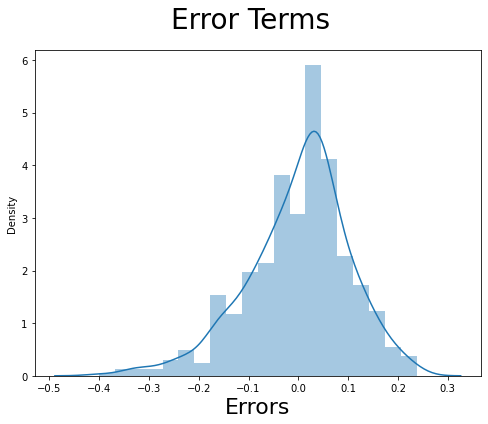

In [871]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize = (8,6))
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 28)                  # Plot heading 
plt.xlabel('Errors', fontsize = 22)                         # X-label

### The Error terms are normally distributed, around zero. 

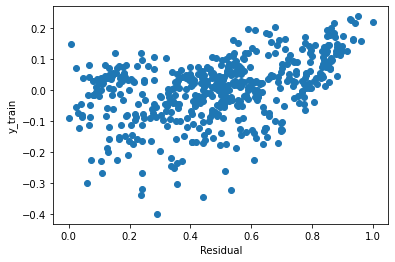

In [872]:
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Most of the residual values are distributed around zero.

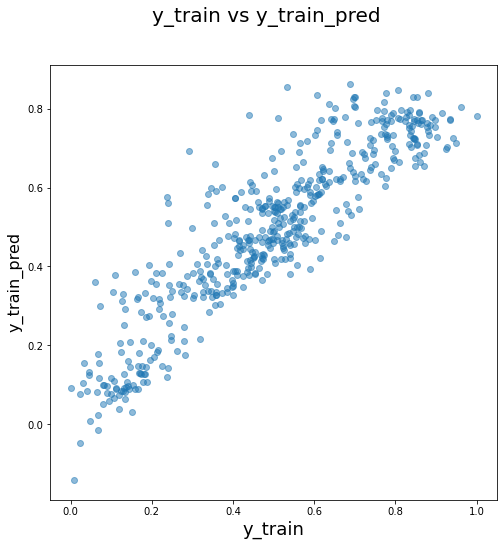

In [869]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure(figsize = (8,8))
plt.scatter(y_train, y_train_pred, alpha=.5)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16) 
plt.show()


## MAKING PREDICTIONS USING THE FINAL MODEL

In [843]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [844]:
df_test

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
42,12,0,0,0,0.203567,0.201994,0.559555,0.373090,0.125679,1,...,0,0,1,0,0,0,0,0,1,0
665,28,1,0,0,0.521309,0.510223,0.714224,0.774353,0.486297,0,...,0,0,0,1,0,0,0,0,0,1
363,30,0,0,1,0.314673,0.314694,0.654670,0.230781,0.310033,1,...,0,0,0,0,0,0,0,0,1,0
664,27,1,0,0,0.586727,0.572392,0.740360,0.439730,0.895931,0,...,0,0,1,0,0,0,0,0,0,1
297,25,0,0,1,0.514041,0.504453,0.640532,0.297413,0.513823,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,18,0,0,0,0.558691,0.540107,0.714653,0.321790,0.463962,0,...,1,0,0,1,0,0,0,0,1,0
262,20,0,0,1,0.626185,0.594817,0.906170,0.232053,0.387541,0,...,1,0,0,0,0,1,0,0,0,1
446,23,1,0,1,0.676027,0.644500,0.713796,0.193597,0.957503,0,...,0,0,0,0,0,0,0,0,0,1
61,3,0,0,1,0.173453,0.158912,0.327335,0.419242,0.151394,1,...,0,0,0,0,1,0,0,0,1,0


In [845]:
df_test.describe()

,day,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,16.337900,0.497717,0.027397,0.694064,0.554749,0.529349,0.660638,0.346098,0.497513,0.237443,...,0.073059,0.118721,0.141553,0.136986,0.141553,0.164384,0.141553,0.045662,0.621005,0.333333
std,9.073349,0.501140,0.163612,0.461858,0.218592,0.204094,0.144755,0.166288,0.228138,0.426491,...,0.260830,0.324202,0.349389,0.344621,0.349389,0.371472,0.349389,0.209229,0.486248,0.472484
min,1.000000,0.000000,0.000000,0.000000,0.060271,0.052856,0.283633,0.041051,-0.049378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.371783,0.367301,0.548201,0.219868,0.343293,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000,1.000000,0.558691,0.542585,0.667952,0.333801,0.486297,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,25.000000,1.000000,0.000000,1.000000,0.745079,0.699215,0.763496,0.430444,0.676808,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,0.970925,0.939531,0.975076,0.864144,0.980804,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [846]:
#splitting the test dataframe into X_test and Y_test with 'cnt' as the dependent variable
y_test = df_test.pop('cnt')
X_test = df_test

In [847]:
#Selecting the variables that were part of final model.
cols = X_train_rfe.columns
X_test = X_test[cols]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8

,const,yr,workingday,temp,season_spring,season_winter,mnth_sept,weekday_sat,weathersit_bad
42,1.0,0,0,0.203567,1,0,0,1,0
665,1.0,1,0,0.521309,0,1,0,0,0
363,1.0,0,1,0.314673,1,0,0,0,0
664,1.0,1,0,0.586727,0,1,0,1,0
297,1.0,0,1,0.514041,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
260,1.0,0,0,0.558691,0,0,1,0,0
262,1.0,0,1,0.626185,0,0,1,0,0
446,1.0,1,1,0.676027,0,0,0,0,0
61,1.0,0,1,0.173453,1,0,0,0,0


In [848]:
# Making predictions using the final model (lr8)

y_test_pred = lr8.predict(X_test_lm8)

In [851]:
r2 = r2_score(y_test, y_test_pred)

In [852]:
r2

0.7532001508712366

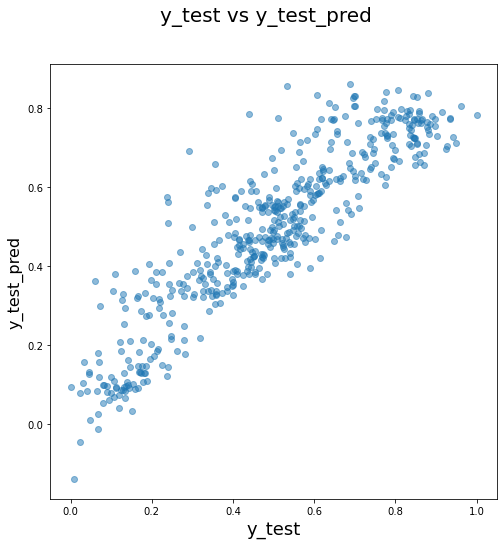

In [873]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure(figsize = (8,8))
plt.scatter(y_train, y_train_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

## Computing adjusted R squared to check if it is close to r squared

In [853]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2



0.7437982518568076

We see that the adjusted r squared, '0.74' is close to the r squared value '0.75'.

# INFERENCE

### The equation of the regression line can be given as:

cnt = 0.1107 + (0.2494)yr + (0.0519)workingday + (0.4364)temp - (0.1445)season_spring + (0.0476)season_winter + (0.0659)mnth_sept + (0.0578)weekday_sat - (0.2445)weathersit_bad

- Temperature has a positive effect on the demand of bikes.
- Month September has the highest demand for bikes.
- Demand for bikes on working days is more
- Spring season has the least demand for bikes.
- Demand for bikes reduces when the weather situation is not good. 
- Saturday has a high demand for bikes in comparison to remaining days of the week. 